### Actividad 10
#### Kathya, Emiliano, Gerardo, Guillermo


In [ ]:
# Importando librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import scipy.optimize as opt

#### Leer datos

In [ ]:
data = pd.read_csv('datos/sales-of-shampoo.csv',encoding = "UTF-8")
data1 = pd.read_csv('datos/sales-of-shampoo.csv',encoding = "UTF-8")

In [ ]:
data

,Month,Sales
0,2011-01-01,266.0
1,2011-02-01,145.9
2,2011-03-01,183.1
3,2011-04-01,119.3
4,2011-05-01,180.3
5,2011-06-01,168.5
6,2011-07-01,231.8
7,2011-08-01,224.5
8,2011-09-01,192.8
9,2011-10-01,122.9


In [ ]:
#Convirtiendo a fechas y poniendo índice de fechas

data['Month'] = pd.to_datetime(data['Month'])
data = data.set_index('Month')

In [ ]:
data

,Sales
Month,
2011-01-01,266.0
2011-02-01,145.9
2011-03-01,183.1
2011-04-01,119.3
2011-05-01,180.3
2011-06-01,168.5
2011-07-01,231.8
2011-08-01,224.5
2011-09-01,192.8


In [ ]:
# describiendo datos
desc = data.describe()

desc

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [ ]:
serie_tiempo = data['Sales']
serie_tiempo.head()

Month
2011-01-01    266.0
2011-02-01    145.9
2011-03-01    183.1
2011-04-01    119.3
2011-05-01    180.3
Name: Sales, dtype: float64

### 1. Checar la estacionalidad de la Serie de Tiempo

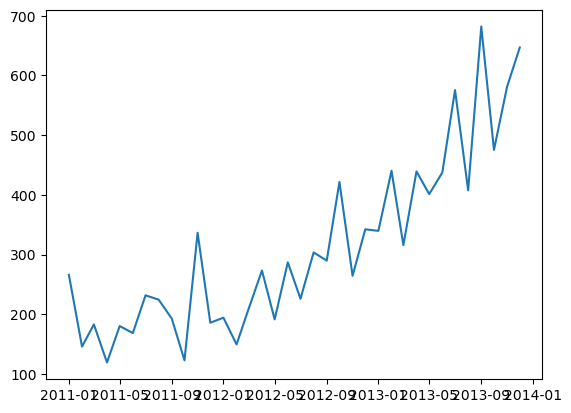

In [ ]:
plt.plot(serie_tiempo)
plt.show()

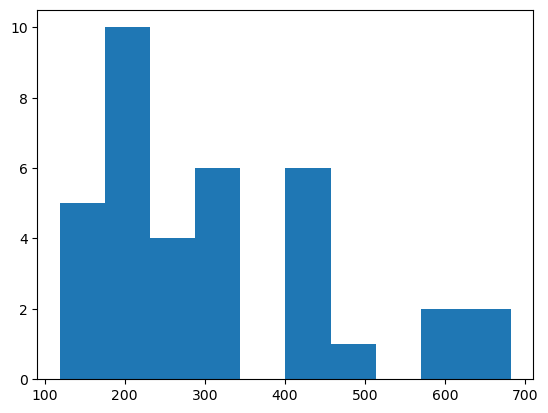

In [ ]:
# Histograma de los datos
plt.hist(serie_tiempo)
plt.show()

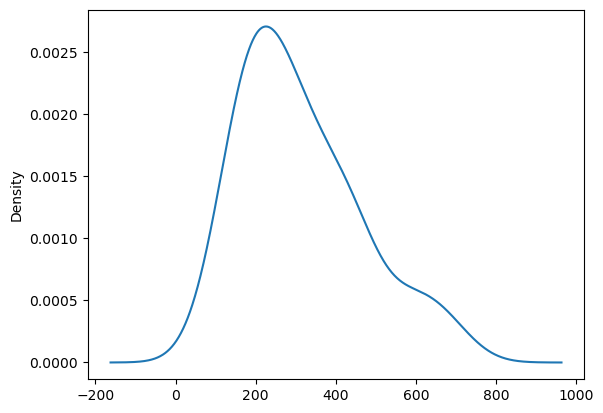

In [ ]:
# Estimación de la función de distribución de probabilidad

serie_tiempo.plot(kind = 'kde')
plt.show()

### 2. Hacer la Serie de Tiempo Estacionaria

In [ ]:
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 3).mean()
    rolstd = timeseries.rolling(window = 3).std()
    
    #plotting rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()

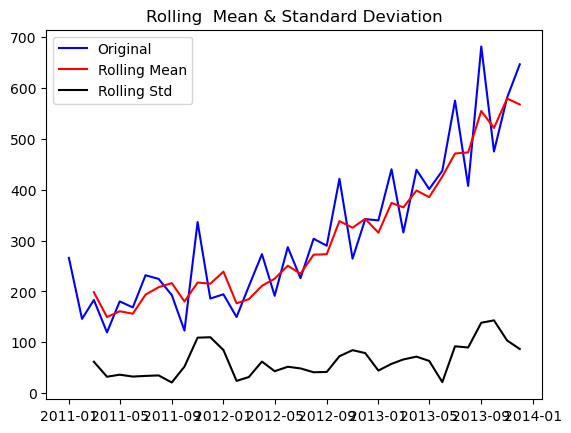

In [ ]:
test_stationarity(serie_tiempo)

In [ ]:
# Agrega tu código de promedios móviles
promedio_movil = data['Sales'].rolling(window=3).mean()

data['promedio_movil'] = promedio_movil

data

,Sales,promedio_movil
Month,,
2011-01-01,266.0,NaN
2011-02-01,145.9,NaN
2011-03-01,183.1,198.333333
2011-04-01,119.3,149.433333
2011-05-01,180.3,160.900000
2011-06-01,168.5,156.033333
2011-07-01,231.8,193.533333
2011-08-01,224.5,208.266667
2011-09-01,192.8,216.366667


### 3. Eliminando Tendencia y Estacionalidad


In [ ]:
data1['Month'] = pd.to_datetime(data['Month'])
data1 = data1.set_index('Month')

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data1, model='additive')

tendencia = decomposition.trend
estacionalidad = decomposition.seasonal
ruido = decomposition.resid

print("Tendencia:")
print(tendencia.head())

print("\nEstacionalidad:")
print(estacionalidad.head())

print("\nRuido:")
print(ruido.head())

Tendencia:
Month
2011-01-01   NaN
2011-02-01   NaN
2011-03-01   NaN
2011-04-01   NaN
2011-05-01   NaN
Name: trend, dtype: float64

Estacionalidad:
Month
2011-01-01   -19.193924
2011-02-01    -2.218924
2011-03-01   -48.175174
2011-04-01    27.591493
2011-05-01   -44.800174
Name: seasonal, dtype: float64

Ruido:
Month
2011-01-01   NaN
2011-02-01   NaN
2011-03-01   NaN
2011-04-01   NaN
2011-05-01   NaN
Name: resid, dtype: float64


### Haciendo Pronóstico con Series de Tiempo

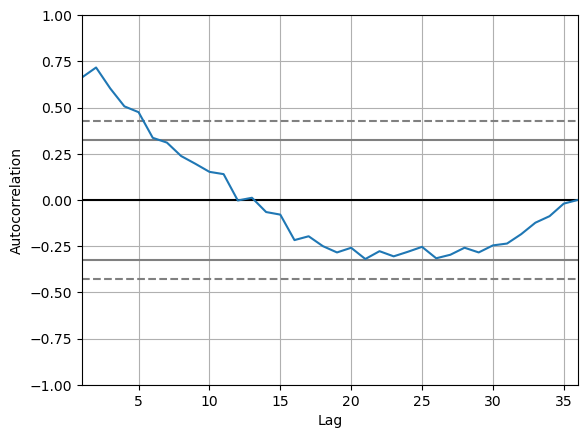

In [ ]:
#ACF plot
pd.plotting.autocorrelation_plot(data1)
plt.show()

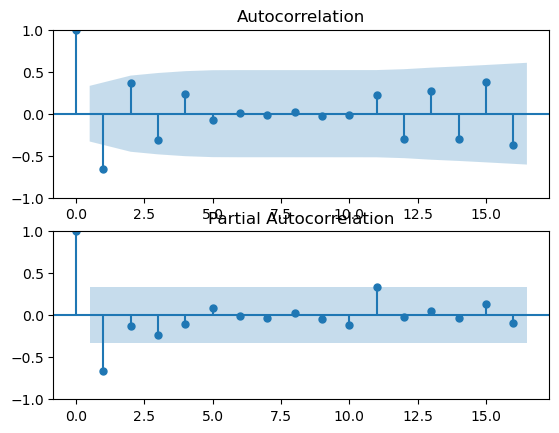

In [ ]:
warnings.filterwarnings("ignore")

serie_tiempo_log = np.log(data1)
serie_tiempo_log_diff = serie_tiempo_log.diff().dropna()

plt.subplot(211)
plot_acf(serie_tiempo_log_diff, ax=plt.gca())
plt.subplot(212)
plot_pacf(serie_tiempo_log_diff, ax=plt.gca())
plt.show()

In [ ]:
#Another method
#ACF and PACF plots
lag_acf = acf(serie_tiempo_log_diff, nlags=3)
lag_pacf = pacf(serie_tiempo_log_diff, nlags=3, method='ols')

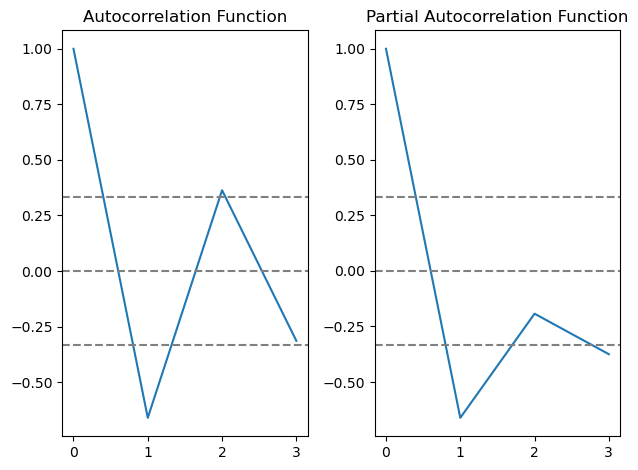

In [ ]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.

#### AR Model

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

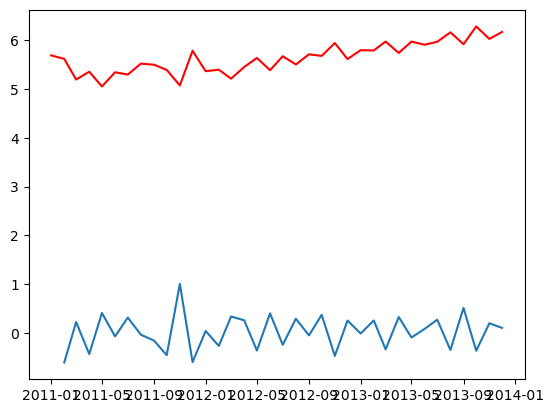

In [ ]:
model = ARIMA(serie_tiempo_log, order=(1,0,0))
results_AR = model.fit(method='statespace')
plt.plot(serie_tiempo_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - serie_tiempo_log_diff)**2)) 
plt.show()

#### MA Model

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

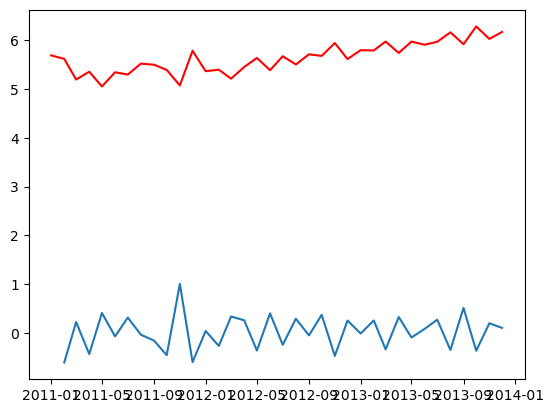

In [ ]:
model = ARIMA(serie_tiempo_log, order= (1,0,0))  
results_MA = model.fit(method='statespace')  
plt.plot(serie_tiempo_log_diff)
plt.plot(results_MA.fittedvalues, color= 'red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - serie_tiempo_log_diff)**2))
plt.show()

#### Model Combinado

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

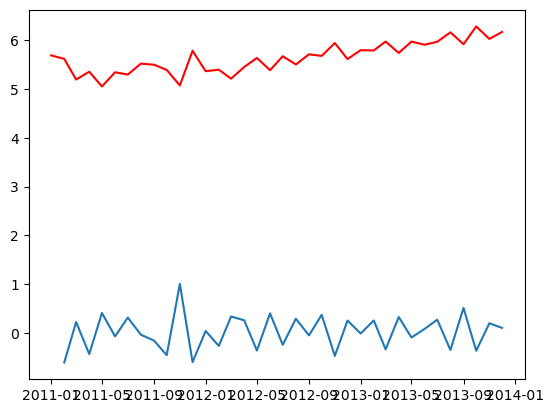

In [ ]:
model = ARIMA(serie_tiempo_log, order = (1,0,0))  
results_ARIMA = model.fit(method='statespace')  
plt.plot(serie_tiempo_log_diff)
plt.plot(results_ARIMA.fittedvalues, color= 'red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - serie_tiempo_log_diff)**2))
plt.show()

#### Regresando a la Serie de Tiempo Original

In [ ]:
p = 0
q = 0
d = 0
maxp = 3
maxd = 2
maxq = 3
aic = []


for p in range(maxp):
    for d in range(maxd):
        for q in range(maxq):
            try:
                model =ARIMA(serie_tiempo_log, order=(p,d,q))
                model_fit=model.fit()
                aic.append(model_fit.aic)

            except:
                continue

In [ ]:
aic

[50.48374035923974,
 42.8600311336604,
 31.405539339620262,
 29.74119779778236,
 13.96823451969367,
 10.819785985398738,
 29.719201016476326,
 19.15091920333954,
 16.109645980561382,
 10.874357105014331,
 11.13957810848338,
 12.641734872686492,
 15.50588605094444,
 16.358015884536606,
 17.898952537754116,
 12.158352410758184,
 13.041590114486027,
 14.586626339135812]

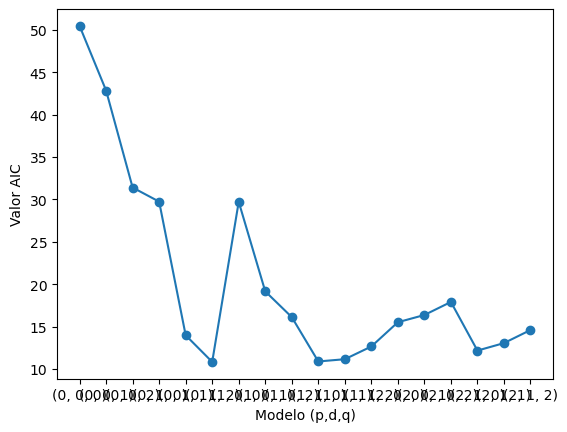

In [ ]:
plt.plot(range(18), aic, marker='o')
plt.xlabel('Modelo (p,d,q)')
plt.ylabel('Valor AIC')
plt.xticks(range(18), [(p,d,q) for p in range(3) for d in range(2) for q in range(3)])
plt.show()